<a href="https://colab.research.google.com/github/rokokzk87/Education/blob/main/%D0%9A%D0%BE%D0%B7%D0%BB%D0%BE%D0%B2_%D0%A0_%D0%92_%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B5%D1%81(Random_forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Импортируем библиотеки и датасеты из PyCaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pycaret
from pycaret.datasets import get_data
all_datasets = get_data('index')

     |████████████████████████████████| 266 kB 5.1 MB/s 
     |████████████████████████████████| 1.7 MB 36.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.6 MB 116 kB/s 
     |████████████████████████████████| 167 kB 72.3 MB/s 
     |████████████████████████████████| 2.0 MB 74.0 MB/s 
     |████████████████████████████████| 1.3 MB 66.6 MB/s 
     |████████████████████████████████| 271 kB 54.2 MB/s 
     |████████████████████████████████| 261 kB 60.9 MB/s 
     |████████████████████████████████| 80 kB 10.6 MB/s 
     |████████████████████████████████| 6.8 MB 47.5 MB/s 
     |████████████████████████████████| 111 kB 59.2 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 74.2 MB/s 
     |████████████████████████████████| 3.1 MB 57.2 MB/s 
     |█████████████████

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [ ]:
#Берем датасет с игроками НБА как и в случае с PyCaret
df=get_data('nba')

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
#Смотрим наличие нулевых значений в датасете
df.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [ ]:
#Заполняем нулевые значения медианными
df = df.fillna(df.median())

In [ ]:
df.isna().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [ ]:
#удаляем столбик с именами, т.к. их наличие негативно повлияет на модель
df=df.drop('Name', axis=1)

In [ ]:
#Делим датасет на тренировочное и тестовое множество в соотношении 80% на 20%
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(df.drop('TARGET_5Yrs',axis=1),df['TARGET_5Yrs'], test_size=0.2, random_state=2312)

In [ ]:
#Импортируем модель случайного леса для решения задач бинарной классификации, обучаем модель на тренировочном множестве
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=322)
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=322)

In [ ]:
#Делаем прогноз на тестовом множестве
predicted=rf.predict(test_x)

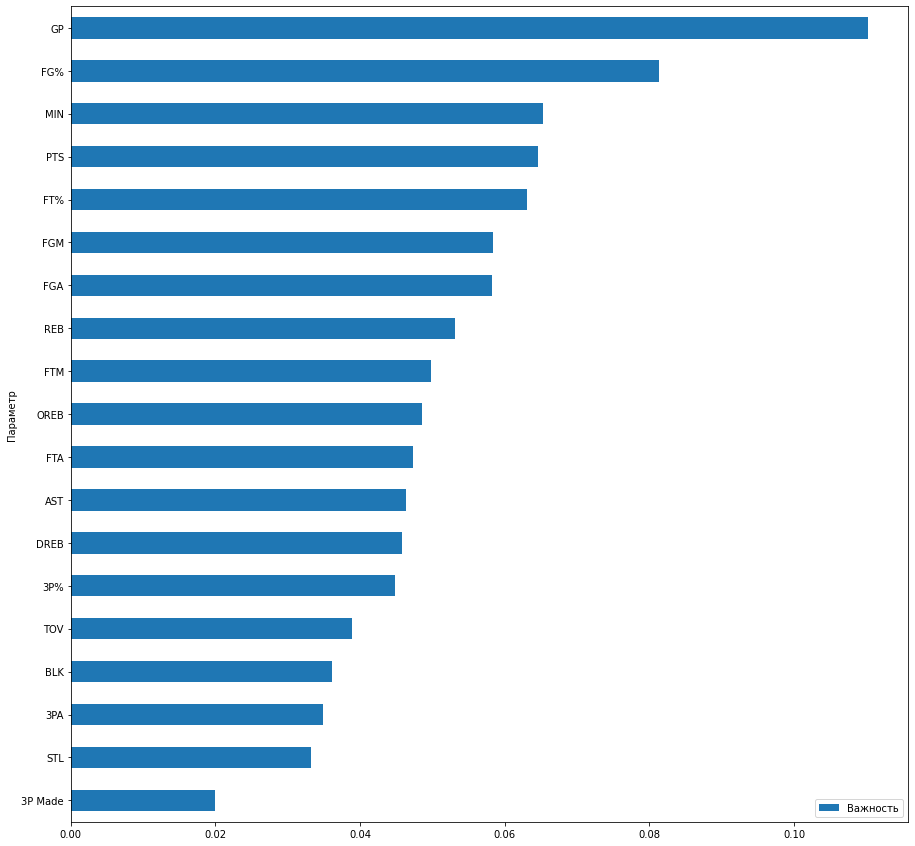

,Важность
Параметр,
3P Made,0.019983
STL,0.033239
3PA,0.034914
BLK,0.036122
TOV,0.038832
3P%,0.044875
DREB,0.045795
AST,0.046376
FTA,0.047275


In [ ]:
#Определяем значимость каждого из параметров модели. В модели случайного леса таким параметром оказался параметр 'GP'(Игр сыграно)
df_importances= sorted(list(zip(df.columns, rf.feature_importances_.ravel())), key=lambda tpl: tpl[1], reverse=False)
df_importances = pd.DataFrame(df_importances, columns=['Параметр', 'Важность']) 
df_importances = df_importances.set_index('Параметр')
df_importances.plot(kind='barh',figsize=(15, 15),)
plt.show()
display(df_importances)

In [ ]:
#Ипортируем метрики качества нашей модели - ROC AUC, Precision, F1 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
#Показатель Precision на тренировочном множестве
precision_score(train_y, train_predictions)

0.9821693907875185

In [ ]:
#Показатель Precision на тестовом множестве
precision_score(test_y, predicted)

0.7415730337078652

In [ ]:
#Показатель F1 на тренировочном множестве
f1_score(train_y, train_predictions)

0.9902621722846441

In [ ]:
#Показатель F1 на тестовом множестве
f1_score(test_y, predicted)

0.7608069164265131

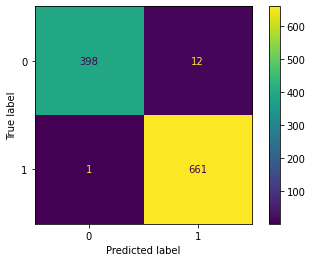

In [ ]:
#Матрица ошибок тренировочного множества
from sklearn import metrics
disp = metrics.plot_confusion_matrix(rf, train_x, 
train_y,values_format = 'n',
display_labels= ["0", "1"])

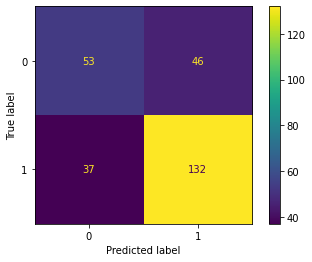

In [ ]:
#Матрица ошибок тестового множества
disp = metrics.plot_confusion_matrix(rf, test_x, 
test_y,values_format = 'n',
display_labels= ["0", "1"])

0.9996739370716969

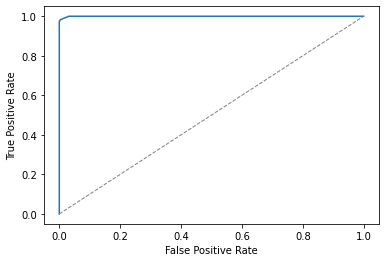

In [ ]:
#График ROC AUC для тренировочного множества
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(train_y, rf.predict_proba(train_x)[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
metrics.auc(fpr, tpr)

0.7425138963600503

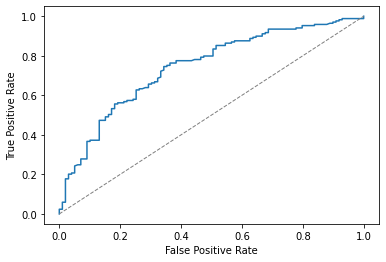

In [ ]:
#График ROC AUC для тестового множества
fpr, tpr, _ = roc_curve(test_y, rf.predict_proba(test_x)[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
metrics.auc(fpr, tpr)

**Итоговые показатели метрик созданной модели значительно отличаются между тренировочным и тестовым множеством, что говорит о некоторой переобученности модели**.